## Context

The Super Bowl is an annual American football game that determines the champion of the National Football League (NFL). The game culminates a season that begins in the previous calendar year, and is the conclusion of the NFL playoffs. The contest is held in an American city, chosen three to four years beforehand, usually at warm-weather sites or domed stadiums. Since January 1971, the winner of the American Football Conference (AFC) Championship Game has faced the winner of the National Football Conference (NFC) Championship Game in the culmination of the NFL playoffs.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)          
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/superbowl-history-1967-2020/superbowl.csv


First lets make read the csv and make sure everything is working correctly.

In [2]:
df = pd.read_csv('../input/superbowl-history-1967-2020/superbowl.csv')
df.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


### Data Information:
* **Date** - Month and Year of the Game
* **SB** - SB is the Super Bowl Number
* **Winner** - Winning Team of the Year
* **Winner Pts** - Total Points of the winning team
* **Loser** - Loser Team of the Year
* **Loser Pts** - Total Points of the losing team
* **MVP** - MVPis most valuable player of the match
* **Stadium** - Stadium who host the game
* **City** - City of the stadium
* **State** - state of the city

Lets check how many Super Bowls there has been.

In [3]:
print('Total number of Super Bowls: ', len(df))

Total number of Super Bowls:  54


## Super Bowl Wins

Now lets find out how many superbowls each team has won.

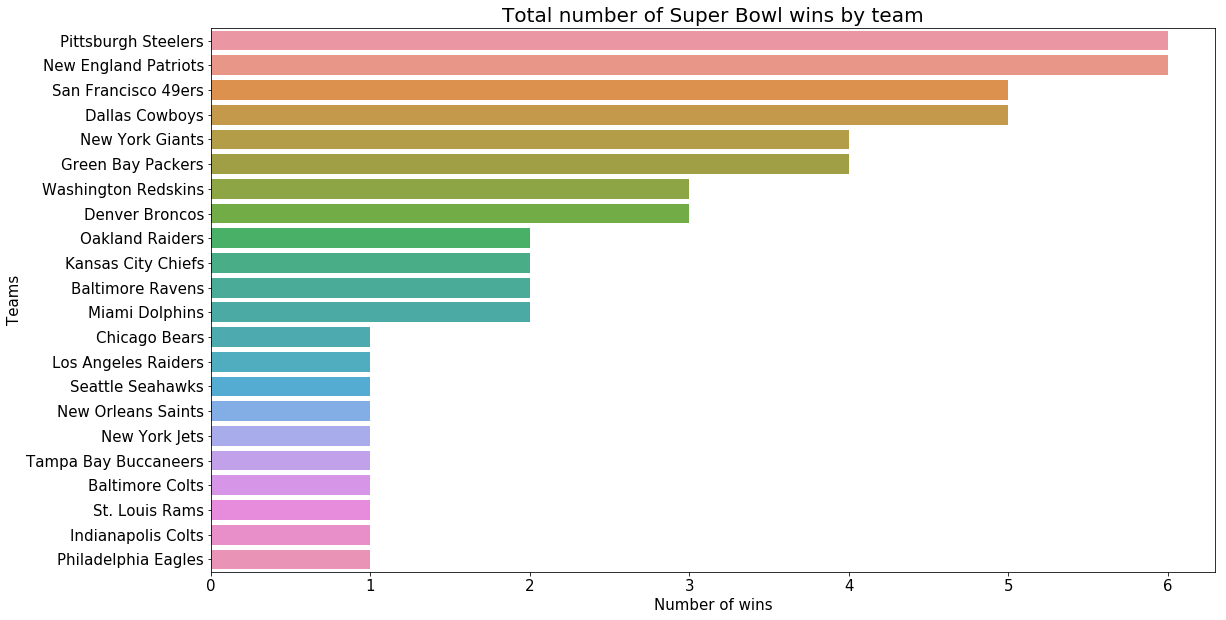

In [4]:
wins = pd.DataFrame(df.Winner.value_counts()).reset_index().rename(columns = {'index' : 'Team'})

# Set the width and height of the figure
plt.figure(figsize=(18,10))

# Bar chart showing average score for racing games by platform
b = sns.barplot(x=wins.Winner, y=wins.Team)

b.axes.set_title("Total number of Super Bowl wins by team",fontsize=20)
b.set_xlabel("Number of wins",fontsize=15)
b.set_ylabel("Teams",fontsize=15)
b.tick_params(labelsize=15)


Based on the above graph we see that the Steelers and Patriots are the teams with most super bowl wins. Trailing behind them are the Cowboys and 49ers.
Notice that not all teams have won a super bowl as there are only 22 teams listed. 

## Super Bowl Losses

Lets now check to see how many loses each team has had in the super bowl.

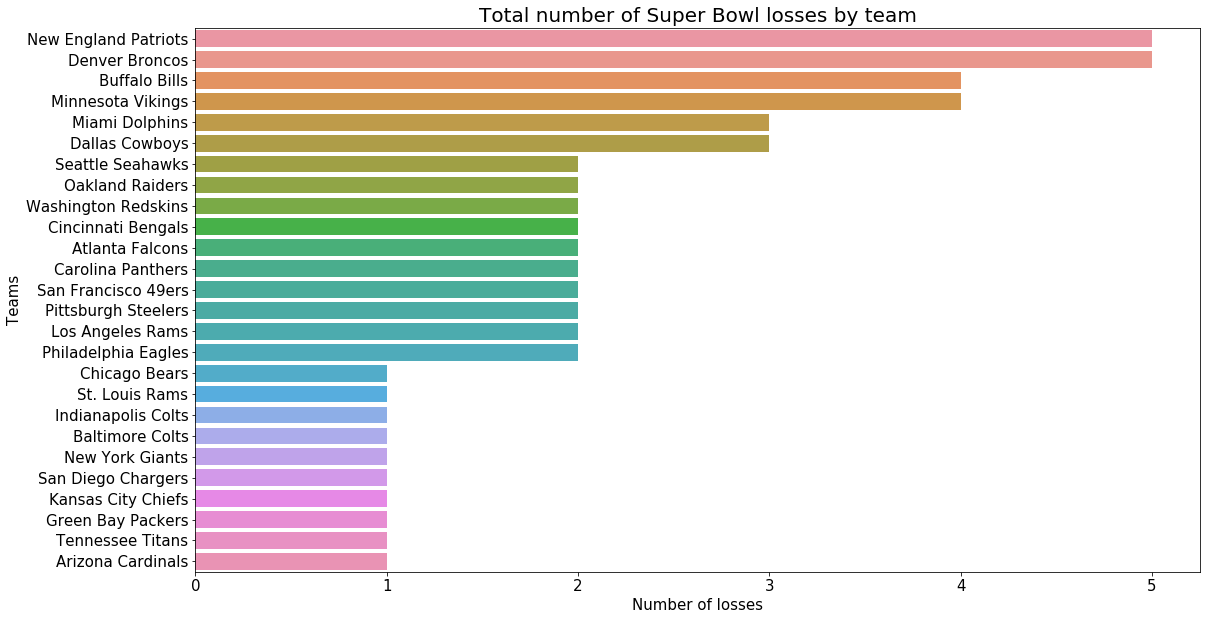

In [5]:
lost = pd.DataFrame(df.Loser.value_counts()).reset_index().rename(columns = {'index' : 'Team'})

# Set the width and height of the figure
plt.figure(figsize=(18,10))

b = sns.barplot(x=lost.Loser, y=lost.Team)

b.axes.set_title("Total number of Super Bowl losses by team",fontsize=20)
b.set_xlabel("Number of losses",fontsize=15)
b.set_ylabel("Teams",fontsize=15)
b.tick_params(labelsize=15)


From this bar graph we can conlcude that the Patriots and Broncos are tied for the most super bowl losses. 

## Super Bowl Appearances

Now that we have seen both wins and losses, lets check to see the total amount of super bowl appearances a team has had.

In [6]:
# merge the two dataframes we created earlier
appearances = wins.set_index('Team').join(lost.set_index('Team'))

# Some teams have not lost in the sb so replace NaN with zero
appearances.Loser.fillna(0, inplace=True)

# create a new column that has the total number of finals appearances
appearances['Finals Count'] = appearances.Winner + appearances.Loser

# the last two columns were float so change them to int and sort the columns
appearances.sort_values(by='Finals Count', ascending=False).astype(int)

,Winner,Loser,Finals Count
Team,,,
New England Patriots,6,5,11
Pittsburgh Steelers,6,2,8
Dallas Cowboys,5,3,8
Denver Broncos,3,5,8
San Francisco 49ers,5,2,7
Washington Redskins,3,2,5
Miami Dolphins,2,3,5
Green Bay Packers,4,1,5
New York Giants,4,1,5


The Patriots have had the most suber bowl appearances by any team while the Steelers, Cowboys, and Broncos are tied for second place.

## MVP Wins

Who has the most MVP wins?

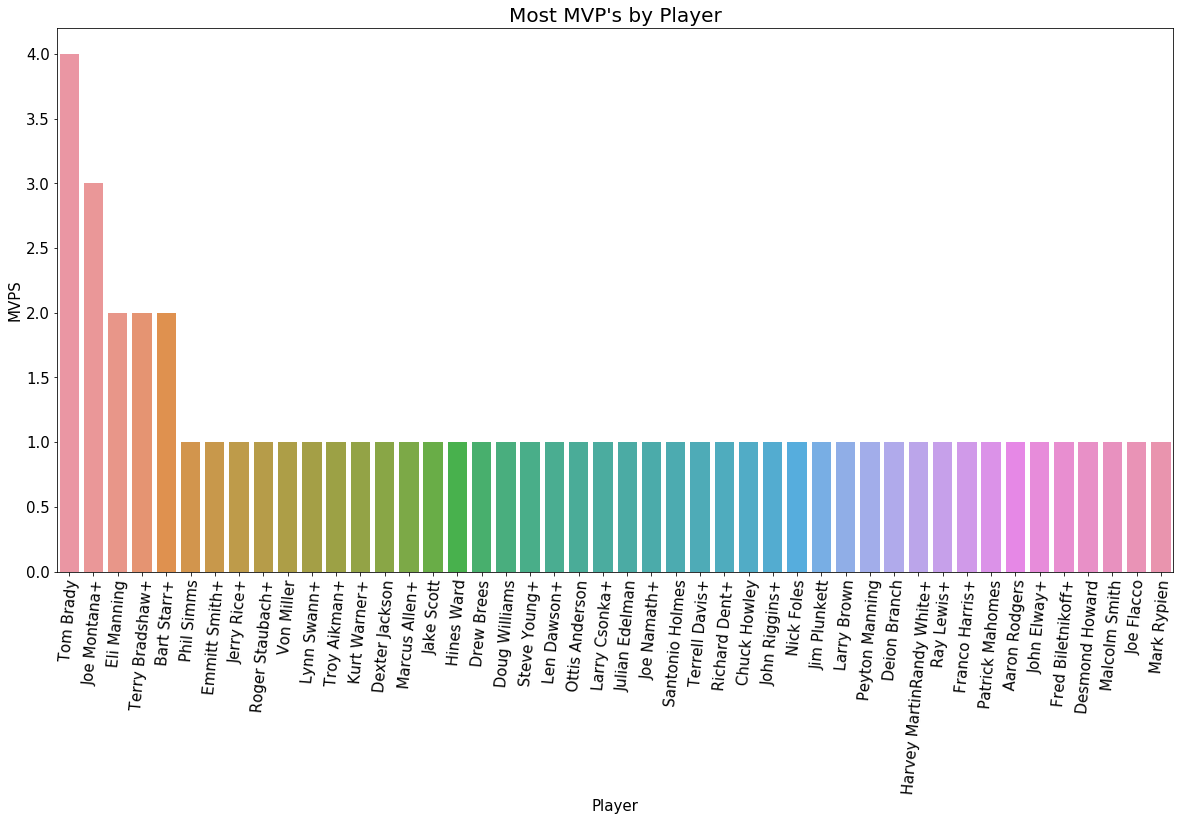

In [7]:
mvp = pd.DataFrame(df.MVP.value_counts()).reset_index().rename(columns = {'index' : 'Player'})

plt.figure(figsize=(20,10))
plt.xticks(rotation=85)

b = sns.barplot(x=mvp.Player, y=mvp.MVP)
b.axes.set_title("Most MVP's by Player",fontsize=20)
b.set_xlabel("Player",fontsize=15)
b.set_ylabel("MVPS",fontsize=15)
b.tick_params(labelsize=15)


## Locations

Let's see where all the super bowls have been held.

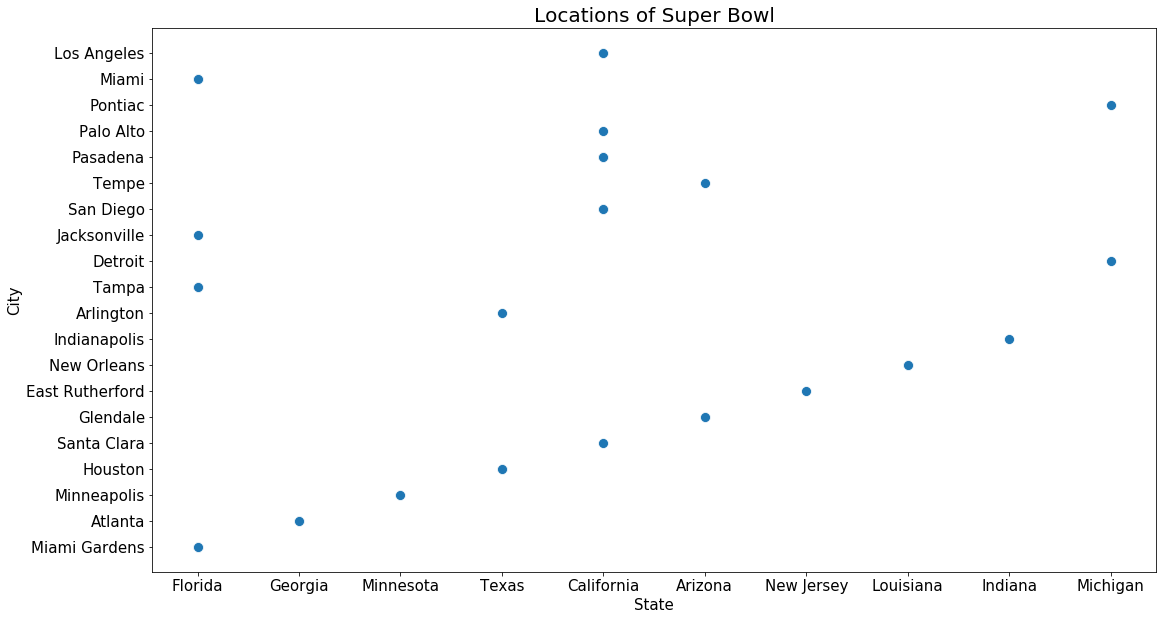

In [8]:
# Set figure size
plt.figure(figsize=(18,10))

# Create Scatter plot
b = sns.scatterplot(x=df.State, y=df.City, s=100)
b.axes.set_title("Locations of Super Bowl",fontsize=20)
b.set_xlabel("State",fontsize=15)
b.set_ylabel("City",fontsize=15)
b.tick_params(labelsize=15)

As we can see here California has held the most super bowls.